# 1. Keyword Search

In [19]:
import requests
import pandas as pd

# API key
api_key = 'PYV795sFJXDJShcDk2z8GdAA8lTExWGb'

#Article Search : Search for NYT articles by keywords, filters and facets.
# !!!!!The Article Search API returns a max of 10 results at a time. 
# page=0 for results 1-10, page=1 for 11-20, ...)up to 100 pages (1,000 results). 

q = 'q=debt+ceiling&page=0&sort=relevance&begin_date=20120101&end_date=20121231'
url_keyword ='https://api.nytimes.com/svc/search/v2/articlesearch.json?'+ q +'&api-key='+ api_key

In [20]:
# Request
def request_api(url):
    r = requests.get(url)
    json_data = r.json()
    keys = json_data.keys()

    if 'results' in keys:
        df = pd.DataFrame(json_data['results'])

    if 'response' in keys:
        df = pd.DataFrame(json_data['response']['docs'])
    
    return df

In [21]:
df_keyword = request_api(url_keyword)
df_keyword['headline'] = df_keyword['headline'].apply(lambda x: x['main'])
df_keyword[['abstract','headline','pub_date','keywords','news_desk','print_page','print_section']]

,abstract,headline,pub_date,keywords,news_desk,print_page,print_section
0,The Times’s Annie Lowrey reports on how the 20...,"The Debt Ceiling, Then and Now",2012-12-14T19:44:46+0000,[],Politics,NaN,NaN
1,Congressional leaders have made clear that the...,Debt Ceiling Complicates a Tax Shift,2012-11-09T02:21:16+0000,"[{'name': 'organizations', 'value': 'Senate', ...",Business,1,B
2,A summary of what’s on today’s editorial page.,Opinion Report: The Debt Ceiling,2012-05-16T12:13:12+0000,[],,NaN,NaN
3,Will Democrats invoke the 14th amendment to pr...,The Debt Ceiling Escape Hatch,2012-06-21T16:15:29+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN
4,Financial markets and credit rating agencies a...,Debt Ceiling Rises Again as Threat for the U.S.,2012-12-21T14:37:27+0000,"[{'name': 'persons', 'value': 'Geithner, Timot...",Business,1,B
5,Republicans will cast votes disapproving of th...,Protest Vote Set on Debt Ceiling,2012-01-17T22:43:34+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN
6,Ron Paul is taking a day out of presidential c...,Paul to Break From Trail for Debt Ceiling Vote,2012-01-17T22:25:28+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN
7,"In a report released Monday, the Government Ac...",Debt-Ceiling Fight Raised Borrowing Costs by $...,2012-07-24T00:45:17+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN
8,President Obama said he would not let a clash ...,Obama and House Republicans Offer Taste of Ren...,2012-05-16T17:53:13+0000,"[{'name': 'subject', 'value': 'United States P...",National,19,A
9,Speaker John A. Boehner appears to be girding ...,Boehner to Double Down on Debt Rule,2012-05-15T16:25:20+0000,"[{'name': 'subject', 'value': 'National Debt (...",,NaN,NaN


In [26]:
pd.DataFrame(df_keyword.keywords.values[1]) # subject: National Debt (US)

,name,value,rank,major
0,organizations,Senate,1,N
1,glocations,United States,2,N
2,persons,"Reid, Harry",3,N
3,subject,United States Politics and Government,4,N
4,subject,Credit Ratings and Credit Rating Agencies,5,N
5,subject,National Debt (US),6,N
6,subject,Taxation,7,N
7,organizations,House of Representatives,8,N
8,subject,Federal Budget (US),9,N
9,subject,Federal Taxes (US),10,N


# 2. Concept Search

In [39]:
url_concept = 'http://api.nytimes.com/svc/semantic/v2/concept/search.json?query=National Debt (US)&concept_type=nytd_des&api-key='+ api_key
requests.get(url_concept).json()

{'copyright': 'Copyright (c) 2021 The New York Times Company. All Rights Reserved.',
 'fields': [],
 'num_results': 1,
 'results': [{'concept_created': '"2009-10-28 14:30:04-04:00"',
   'concept_gender': None,
   'concept_id': 17096,
   'concept_is_locked_by': 'dai.ichikawa@nytimes.com',
   'concept_locked_at': '"2023-04-04 09:35:14-04:00"',
   'concept_name': 'National Debt (US)',
   'concept_rule': '(OR,(OR,_headline:"national debt",_headline:"u.s. budget deficit","Gramm-Rudman-Hollings"),(AND,(MINOC_2,"debt-to-G.D.P.","debt-to-GDP","debt ceiling","debt limit","debt talks","deficit hawkery","deficit hawks","federal budget deficit","federal deficit","federal debt","national debt"),(OR,"america","americans","boehner","bush","congress","geithner","g.o.p.","the house","obama","reid","republicans","senate","treasury","trump","u.s.","united states")),(PAR,(OR,"federal budget deficit","federal debt","government debt","national debt","trillion deficit"),(OR,"congressional budget office","gro

In [52]:
url_debt = 'http://api.nytimes.com/svc/semantic/v2/concept/name/nytd_des/National Debt (US)?fields=all&api-key='+ api_key
results = requests.get(url_debt).json()['results'][0]

In [63]:
df_debt = pd.DataFrame(results['article_list']['results'])

In [64]:
df_debt

,body,byline,concepts,date,document_type,title,type_of_material,url
0,Some Biden administration officials believe a ...,By Linda Qiu,{'nytd_des': ['United States Politics and Gove...,2023-05-02T18:56:16+0000,article,Why the 14th Amendment Is Being Cited in the D...,News,https://www.nytimes.com/2023/05/02/us/politics...
1,Congress controls how much money the United St...,By Alan Rappeport,"{'nytd_des': ['Federal Budget (US)', 'Budgets ...",2023-05-02T16:54:07+0000,article,Everything You Need to Know About the Debt Cei...,News,https://www.nytimes.com/2023/05/02/business/ec...
2,House Democratic leaders who have been quietly...,By Carl Hulse,"{'nytd_des': ['Law and Legislation', 'Federal ...",2023-05-02T15:53:54+0000,article,House Democrats Move to Force a Debt-Limit Inc...,News,https://www.nytimes.com/2023/05/02/us/politics...
3,As the government heads toward a possible defa...,By Jim Tankersley,{'nytd_des': ['Fourteenth Amendment (US Consti...,2023-05-02T15:06:44+0000,article,Is the Debt Limit Constitutional? Biden Aides ...,News,https://www.nytimes.com/2023/05/02/us/politics...
4,President Biden said he would meet with lawmak...,By Alan Rappeport and Jim Tankersley,{'nytd_des': ['United States Politics and Gove...,2023-05-01T20:25:39+0000,article,"U.S. Could Run Out of Cash by June 1, Yellen W...",News,https://www.nytimes.com/2023/05/01/us/politics...
5,The looming crisis over the U.S. debt ceiling ...,"By Michael Barbaro, Rikki Novetsky, Mary Wilso...","{'nytd_des': ['audio-neutral-informative', 'Un...",2023-05-01T10:00:08+0000,article,Kevin McCarthy’s Debt Ceiling Dilemma,News,https://www.nytimes.com/2023/05/01/podcasts/th...
6,The Treasury Department’s ability to delay a d...,By Alan Rappeport,{'nytd_des': ['United States Politics and Gove...,2023-05-01T09:00:12+0000,article,Trickling Tax Revenue Complicates Debt Limit T...,News,https://www.nytimes.com/2023/05/01/us/politics...
7,"The speaker’s all-carrots, no-sticks approach ...",By Catie Edmondson,"{'nytd_des': ['National Debt (US)', 'Federal B...",2023-04-28T22:25:34+0000,article,McCarthy Brought His Detractors in From the Co...,News,https://www.nytimes.com/2023/04/28/us/politics...
8,Speaker Kevin McCarthy squeezed a debt ceiling...,By Carl Hulse,{'nytd_des': ['United States Politics and Gove...,2023-04-27T21:42:17+0000,article,The Real Debt Limit Fight Is Yet to Come,News Analysis,https://www.nytimes.com/2023/04/27/us/politics...
9,After Republicans passed a bill that pairs spe...,By Jim Tankersley,"{'nytd_des': ['National Debt (US)', 'Federal B...",2023-04-27T16:11:11+0000,article,Biden Faces His First Big Choice on Debt Limit,News,https://www.nytimes.com/2023/04/27/us/politics...


In [65]:
df_debt.head(1).url

0    https://www.nytimes.com/2023/05/02/us/politics...
Name: url, dtype: object

# 3. Article Achieve

In [66]:
#read all json files and concat into one dataframe
import glob
import pandas as pd
import json

path = r'/Users/jiayue.yuan/Documents/GitHub/post_covid/nytimes_json' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    with open(filename) as f:
        data = json.load(f)
        df = pd.DataFrame(data['response']['docs'])
        li.append(df)

df_all = pd.concat(li, axis=0, ignore_index=True)

In [67]:
df_all.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,"Quotation of the Day for Monday, April 1, 2019.",https://www.nytimes.com/2019/03/31/todayspaper...,"Quotation of the Day for Monday, April 1, 2019.",“I shouldn’t be thinking about legal precedent...,A,3,The New York Times,[],{'main': 'Quotation of the Day: Ripped-Off Rif...,[],2019-04-01T00:03:11+0000,article,Summary,Today’s Paper,"{'original': '', 'person': [], 'organization':...",Quote,nyt://article/3f320ac1-19a5-56c8-bee4-739132fb...,47,nyt://article/3f320ac1-19a5-56c8-bee4-739132fb...,NaN
1,"Istanbul, the president’s hometown and strongh...",https://www.nytimes.com/2019/03/31/world/europ...,"Istanbul, the president’s hometown and strongh...",ISTANBUL — President Recep Tayyip Erdogan conf...,A,6,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Erdogan, Turkey’s Leader, Staring at...","[{'name': 'persons', 'value': 'Erdogan, Recep ...",2019-04-01T00:03:43+0000,article,Foreign,World,"{'original': 'By Carlotta Gall', 'person': [{'...",News,nyt://article/978079b7-4f26-56a4-8644-838384e3...,1179,nyt://article/978079b7-4f26-56a4-8644-838384e3...,Europe
2,In Mara Nelson-Greenberg’s fitfully funny play...,https://www.nytimes.com/2019/03/31/theater/do-...,In Mara Nelson-Greenberg’s fitfully funny play...,Now it’s empathy that’s the thing with feather...,C,5,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Review: ‘Do You Feel Anger’ Plumbs t...,"[{'name': 'subject', 'value': 'Theater', 'rank...",2019-04-01T01:45:04+0000,article,Culture,Theater,"{'original': 'By Ben Brantley', 'person': [{'f...",Review,nyt://article/0ba4d2f7-3af0-5bfa-8e5b-629fc150...,942,nyt://article/0ba4d2f7-3af0-5bfa-8e5b-629fc150...,NaN
3,"“What the Constitution Means to Me,” the best ...",https://www.nytimes.com/2019/03/31/theater/wha...,"“What the Constitution Means to Me,” the best ...","As you enter the theater, there are 163 men on...",C,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Review: Can a Play Make the Constitu...,"[{'name': 'subject', 'value': 'Theater', 'rank...",2019-04-01T01:45:05+0000,article,Culture,Theater,"{'original': 'By Jesse Green', 'person': [{'fi...",Review,nyt://article/8dec131b-41d5-5284-b7e2-38198ba6...,1231,nyt://article/8dec131b-41d5-5284-b7e2-38198ba6...,NaN
4,Turns out that a Jacobean tragedy with a bleak...,https://www.nytimes.com/2019/03/31/theater/the...,Turns out that a Jacobean tragedy with a bleak...,If you find plausible psychology aggravating a...,C,2,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Review: In ‘The White Devil,’ Pick Y...","[{'name': 'subject', 'value': 'Theater', 'rank...",2019-04-01T01:45:05+0000,article,Culture,Theater,"{'original': 'By Alexis Soloski', 'person': [{...",Review,nyt://article/b8851437-3474-5ed4-b9aa-adbc2e95...,598,nyt://article/b8851437-3474-5ed4-b9aa-adbc2e95...,NaN


In [84]:
# convert "keywords" to string
df_test = df_all.copy()
df_test['keywords'] = df_test['keywords'].apply(lambda x: str(x))
#count the length
df_count = df_test['keywords'].apply(lambda x: len(x)).value_counts().to_frame()

In [86]:
df_count["ratio"] = df_count['keywords']/df_count['keywords'].sum()
df_count

,keywords,ratio
2,24013,0.086527
83,2994,0.010788
377,2408,0.008677
79,1395,0.005027
76,1194,0.004302
...,...,...
1927,1,0.000004
1711,1,0.000004
2053,1,0.000004
1889,1,0.000004


In [88]:
#select data where keywords contains 'National Debt (US)', convert the keywords column to string first
df_debt = df_all[df_all['keywords'].apply(lambda x: 'National Debt (US)' in str(x))]

/var/folders/q_/2syhc8zd0bzd52v4kv8xp4g80000gq/T/ipykernel_67523/997272828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_debt['pub_date'] = pd.to_datetime(df_debt['pub_date']).dt.date


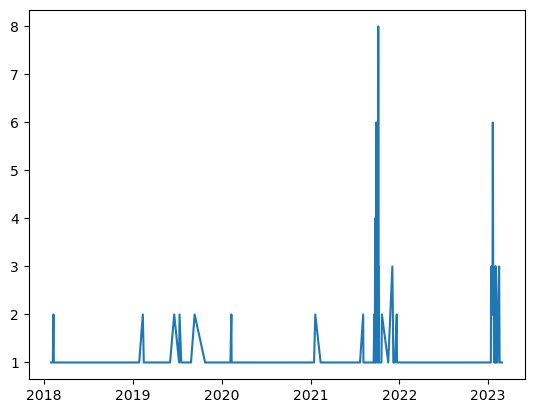

In [92]:
# count the number of articles for each day
df_debt['pub_date'] = pd.to_datetime(df_debt['pub_date']).dt.date
df_debt['pub_date'].value_counts().to_frame()

# plot the number of articles for each day
import matplotlib.pyplot as plt
df_debt['pub_date'].value_counts().plot()
plt.show()
